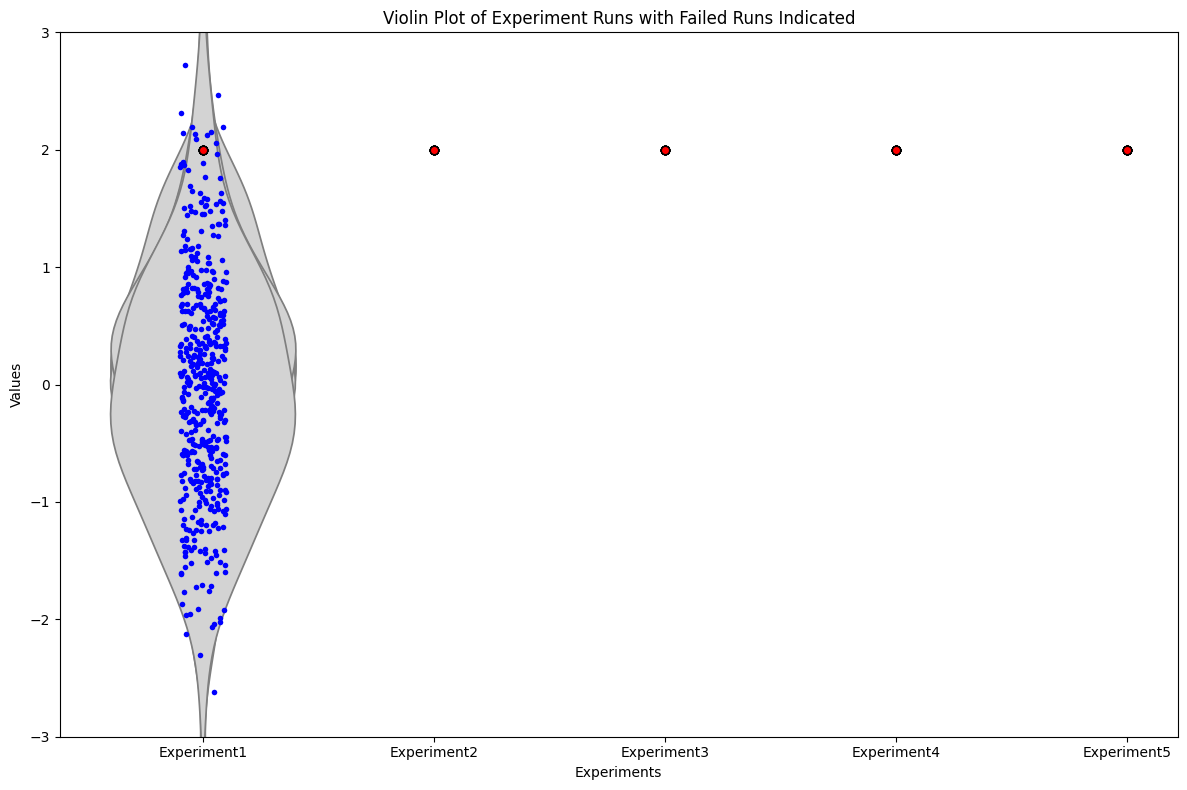

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Generate sample data
np.random.seed(42)
data = np.random.normal(size=(100, 5))  # 100 experiments, 5 different categories
failures = np.random.choice([0, 1], size=(100, 5), p=[0.9, 0.1])  # 10% chance of failure

# Create a DataFrame
df = pd.DataFrame(data, columns=['Experiment1', 'Experiment2', 'Experiment3', 'Experiment4', 'Experiment5'])
df_failures = pd.DataFrame(failures, columns=['Experiment1', 'Experiment2', 'Experiment3', 'Experiment4', 'Experiment5'])

# Plotting
plt.figure(figsize=(12, 8))

for i, col in enumerate(df.columns):
    # Violin plot
    sns.violinplot(data=df[col], inner=None, color="lightgray", ax=plt.gca())
    
    # Scatter plot for individual runs
    sns.stripplot(data=df[col], color='blue', jitter=True, size=4, ax=plt.gca())
    
    # Failed runs
    failed_runs = df[col][df_failures[col] == 1]
    plt.scatter([i] * len(failed_runs), [2] * len(failed_runs), color='red', edgecolor='black', zorder=5)

# Customizing plot
plt.title("Violin Plot of Experiment Runs with Failed Runs Indicated")
plt.xlabel("Experiments")
plt.ylabel("Values")
plt.xticks(ticks=range(len(df.columns)), labels=df.columns)
plt.ylim(-3, 3)  # Adjust the y-axis to make space for the failure dots

plt.tight_layout()
plt.show()